In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
train = pd.read_csv('train.csv', engine='python')
test = pd.read_csv('test.csv', engine = 'python')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [4]:
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [5]:
train = train.fillna(0)
test = test.fillna(0)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [7]:
train_ID = train['custid']
test_id = test['custid']

train.drop('custid', axis=1, inplace=True)
test.drop('custid', axis=1, inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    5000 non-null   float64
 10  겨울_구매건수    5000 non-null   float64
 11  봄_구매건수     5000 non-null   float64
 12  여름_구매건수    5000 non-null   float64
 13  아침_구매건수    5000 non-null   float64
 14  저녁_구매건수    5000 non-null   float64
 15  점심_구매건수    5000 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


In [9]:
# 한글로 하면 계속 에러날거같으니까
# 그냥 죄다 영어로 바꾸자
# 나중에 어렵게하고싶지 않아.

train=train.rename(columns={'총구매액':'tot_price', '구매건수':'count', 
                         '평균구매가격':'avg_price', '평균할부개월수':'avg_install',
                         '구매브랜드종류':'brand_category', '내점일수':'visited', 
                         '수입상품_구매비율':'income_rate', '주말방문비율':'week_visited',
                         '가을_구매건수':'fall_count', '겨울_구매건수':'wint_count',
                         '봄_구매건수':'spring_count', '여름_구매건수':'summer_count',
                         '아침_구매건수':'morning_count', '저녁_구매건수':'night_count',
                         '점심_구매건수':'after_count', '주구매코너':'major'})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5000 non-null   int64  
 1   tot_price       5000 non-null   int64  
 2   count           5000 non-null   int64  
 3   avg_price       5000 non-null   int64  
 4   avg_install     5000 non-null   float64
 5   brand_category  5000 non-null   int64  
 6   visited         5000 non-null   int64  
 7   income_rate     5000 non-null   float64
 8   week_visited    5000 non-null   float64
 9   fall_count      5000 non-null   float64
 10  wint_count      5000 non-null   float64
 11  spring_count    5000 non-null   float64
 12  summer_count    5000 non-null   float64
 13  morning_count   5000 non-null   float64
 14  night_count     5000 non-null   float64
 15  after_count     5000 non-null   float64
 16  major           5000 non-null   object 
dtypes: float64(10), int64(6), object(

In [10]:
# 수치형으로 입력할경우 순위가 생기기떄문에 안됨
# 그래서 one-hot 인코딩으로 



train['major'].value_counts()

일반식품        1306
화장품         1206
유니캐주얼        410
유아동복         383
스포츠          301
영캐주얼         246
캐릭터캐주얼       188
수입명품         136
섬유            96
니트단품          91
트래디셔널캐주얼      91
정장셔츠          90
엘레강스캐주얼       78
피혁A           75
장신구           68
피혁B           56
디자이너부띠끄       51
문화완구          38
조리욕실          28
가전            18
기타바이어         12
도자기크리스탈       11
침구수예           8
가구             7
타운모피           6
Name: major, dtype: int64

In [11]:
# major를 숫자화 한다
train['major'] = train['major'].astype('category')
train['major'] = train['major'].cat.codes
train['major'].value_counts()

14    1306
24    1206
12     410
13     383
9      301
11     246
19     188
8      136
7       96
21      91
3       91
16      90
10      78
22      75
15      68
23      56
5       51
6       38
17      28
1       18
2       12
4       11
18       8
0        7
20       6
Name: major, dtype: int64

In [12]:
df_corr = train.corr()
df_corr

,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,fall_count,wint_count,spring_count,summer_count,morning_count,night_count,after_count,major
gender,1.000000,0.099137,0.094022,0.072181,-0.020066,0.083988,0.084255,-0.021294,0.020457,0.088600,0.065261,0.076116,0.101900,0.127779,-0.021618,0.097237,-0.039270
tot_price,0.099137,1.000000,0.712183,0.376395,0.137335,0.714774,0.617210,-0.048053,-0.048515,0.657523,0.620446,0.635757,0.619743,0.456158,0.398494,0.709572,-0.141735
count,0.094022,0.712183,1.000000,-0.057376,-0.037878,0.869075,0.942115,-0.210022,-0.096558,0.896969,0.879652,0.895580,0.883784,0.672721,0.643764,0.945027,-0.143826
avg_price,0.072181,0.376395,-0.057376,1.000000,0.407556,0.002931,-0.091136,0.189608,0.036426,-0.036019,-0.052918,-0.048857,-0.064851,-0.040362,-0.092749,-0.028726,-0.044333
avg_install,-0.020066,0.137335,-0.037878,0.407556,1.000000,-0.002074,-0.076343,0.097727,-0.001625,-0.018789,-0.039526,-0.033855,-0.041831,-0.047450,-0.051170,-0.014389,-0.021258
brand_category,0.083988,0.714774,0.869075,0.002931,-0.002074,1.000000,0.780303,-0.234547,-0.080674,0.777740,0.774681,0.784562,0.755035,0.582657,0.578552,0.813712,-0.166345
visited,0.084255,0.617210,0.942115,-0.091136,-0.076343,0.780303,1.000000,-0.225363,-0.114795,0.843133,0.836375,0.843763,0.827751,0.638138,0.634809,0.875888,-0.136688
income_rate,-0.021294,-0.048053,-0.210022,0.189608,0.097727,-0.234547,-0.225363,1.000000,0.016123,-0.183411,-0.185994,-0.193382,-0.184013,-0.133133,-0.170649,-0.186310,0.277087
week_visited,0.020457,-0.048515,-0.096558,0.036426,-0.001625,-0.080674,-0.114795,0.016123,1.000000,-0.084014,-0.071125,-0.093424,-0.092989,-0.113193,-0.006852,-0.094814,0.064942
fall_count,0.088600,0.657523,0.896969,-0.036019,-0.018789,0.777740,0.843133,-0.183411,-0.084014,1.000000,0.729604,0.732474,0.735223,0.607713,0.572024,0.848190,-0.119888


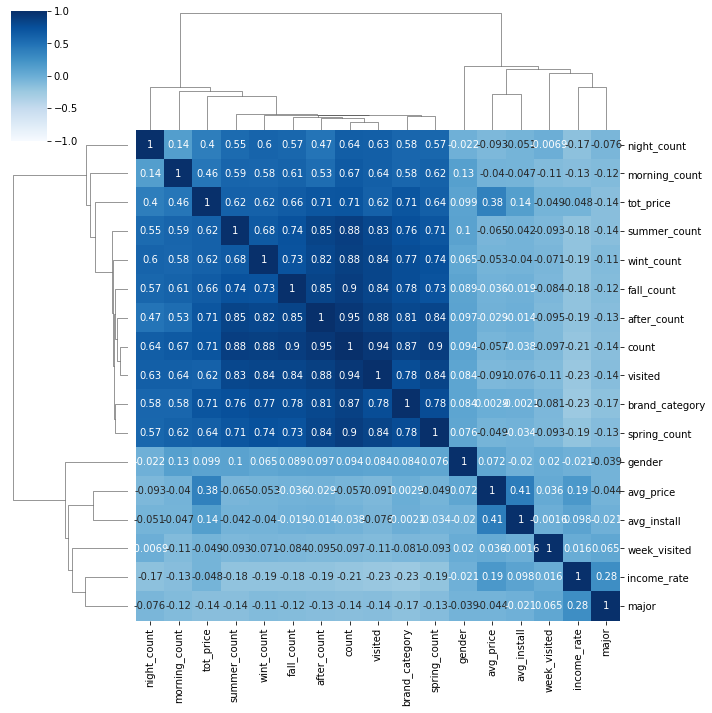

In [13]:
import seaborn as sns
df_mapping = sns.clustermap(df_corr, cbar = True, 
                            annot=True,
                            cmap = 'Blues',
                            vmin=-1, vmax=1)

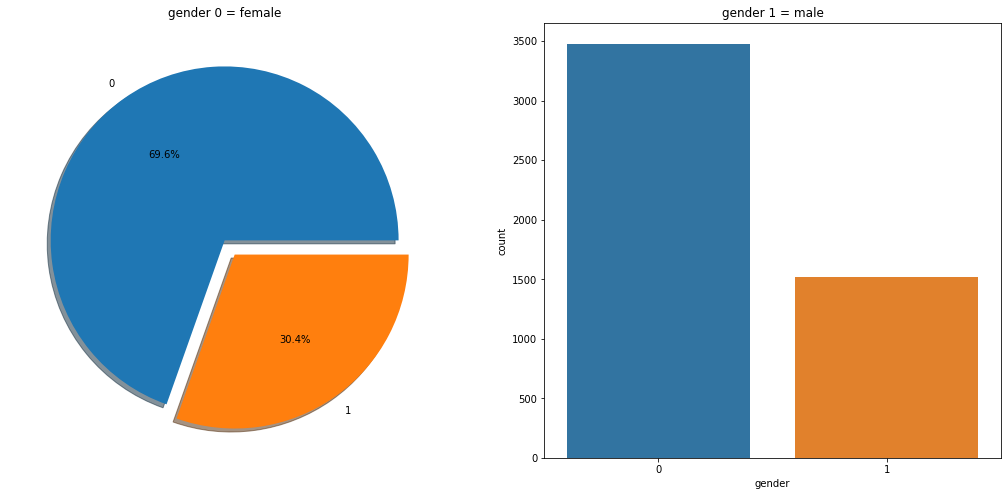

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('gender 0 = female')
ax[0].set_ylabel('')
sns.countplot('gender',data=train,ax=ax[1])
ax[1].set_title('gender 1 = male')
plt.show()

In [15]:
# introduce new feature
train['tot_exported_goods'] = np.where((train['income_rate']!=0),
                                (train['income_rate']* train['tot_price']) / 100, 0)

In [ ]:
# introduce new feature
train['tot_exported_goods'] = np.where((train['income_rate']!=0),
                                (train['income_rate']* train['tot_price']) / 100, 0)

In [16]:
# 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경
def createFeatures(df_p):
    df_p['morning_price'] = np.round(df_p['tot_price']*(df_p['morning_count'] /df_p['count'] ), 3)
    df_p['after_price'] = np.round(df_p['tot_price']*(df_p['after_count'] /df_p['count'] ), 3)
    df_p['night_price'] = np.round(df_p['tot_price']*(df_p['night_count'] /df_p['count'] ), 3)  
    df_p['spring_price']   = np.round(df_p['tot_price']*(df_p['spring_count'] /df_p['count'] ), 3) 
    df_p['summer_price'] = np.round(df_p['tot_price']*(df_p['summer_count'] /df_p['count'] ), 3) 
    df_p['fall_price'] = np.round(df_p['tot_price']*(df_p['fall_count'] /df_p['count'] ), 3)  
    df_p['wint_price'] = np.round(df_p['tot_price']*(df_p['wint_count'] /df_p['count'] ), 3)  
    df_p['visited_price'] = np.round(df_p['count'] /df_p['visited'], 3)

def dropFeatures(df_p):
    drop_cols = ['morning_count', 'after_count', 'night_count', 'tot_price', 'count',
         'spring_count', 'summer_count', 'fall_count', 'wint_count', 'visited'] 
    
    return df_p.drop(drop_cols, axis=1)

createFeatures(train)
dataPP = dropFeatures(train) 
dataPP[(dataPP['major']==2)].head()

,gender,avg_price,avg_install,brand_category,income_rate,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
39,0,90960,3.0,4,20.0,25.0,2,90960.00,0.000,90960.000,363840.000,454800.000,0.000,0.000,0.000,1.250
478,0,248049,2.3,10,10.5,33.3,2,494858.07,992196.632,3224639.053,496098.316,744147.474,992196.632,1736344.105,1240245.789,1.583
1126,1,124767,3.8,8,25.0,62.5,2,374300.00,124766.667,499066.667,873366.667,249533.333,499066.667,748600.000,0.000,1.500
1265,0,79250,1.7,10,0.0,33.3,2,0.00,554750.000,396250.000,0.000,158500.000,0.000,792500.000,0.000,4.000
1612,0,31625,1.0,6,12.5,14.3,2,31625.00,63250.000,189750.000,0.000,94875.000,158125.000,0.000,0.000,1.143


In [17]:
# 학습용 데이터 확정

dataPT = dataPP.copy()
dataPD = dataPT.drop(['avg_install'], axis=1)

dfy = dataPD['gender']
dfX = dataPD.drop('gender', axis=1)
dfX.tail()

,avg_price,brand_category,income_rate,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
4995,71683,27,10.8,43.6,14,719983.836,573463.828,3154051.054,2939002.118,1003561.699,2365538.290,931878.720,2365538.290,2.385
4996,183065,10,29.4,38.5,5,914957.400,549194.118,2562905.882,0.000,1098388.235,183064.706,732258.824,1098388.235,1.308
4997,158175,14,40.5,19.0,24,2370255.210,2530803.027,3321678.973,0.000,949051.135,2056277.459,1898102.270,949051.135,1.762
4998,50346,10,7.7,14.3,22,50396.346,0.000,553806.000,100692.000,100692.000,50346.000,302076.000,201384.000,1.857
4999,79835,9,21.9,34.6,14,559484.337,638680.750,1516866.781,399175.469,798350.938,878186.031,479010.562,399175.469,1.231


In [18]:
dfX.shape

(5000, 14)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [20]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [21]:
import xgboost as xgb
from xgboost import plot_importance
#import pan
import numpy as np

In [158]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [159]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [160]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[0]	train-logloss:0.675638	eval-logloss:0.675323
[1]	train-logloss:0.661388	eval-logloss:0.660677
[2]	train-logloss:0.649342	eval-logloss:0.648071
[3]	train-logloss:0.639571	eval-logloss:0.637979
[4]	train-logloss:0.631272	eval-logloss:0.629442
[5]	train-logloss:0.624118	eval-logloss:0.622106
[6]	train-logloss:0.618087	eval-logloss:0.6161
[7]	train-logloss:0.613084	eval-logloss:0.611214
[8]	train-logloss:0.608556	eval-logloss:0.607043
[9]	train-logloss:0.604447	eval-logloss:0.603819
[10]	train-logloss:0.601262	eval-logloss:0.600949
[11]	train-logloss:0.598408	eval-logloss:0.598657
[12]	train-logloss:0.595684	eval-logloss:0.59673
[13]	train-logloss:0.593124	eval-logloss:0.595001
[14]	train-logloss:0.590998	eval-logloss:0.593664
[15]	train-logloss:0.589	eval-logloss:0.592699
[16]	train-logloss:0.587253	eval-logloss:0.591551
[17]	train-logloss:0.585787	eval-logloss:0.590496
[18]	train-logloss:0.584084	eval-logloss:0.589572
[19]	train-logloss:0.582684	eval-logloss:0.589281
[20]	train-loglo

[164]	train-logloss:0.503382	eval-logloss:0.602088
[165]	train-logloss:0.503072	eval-logloss:0.602206
[166]	train-logloss:0.502308	eval-logloss:0.601909
[167]	train-logloss:0.501854	eval-logloss:0.601921
[168]	train-logloss:0.501339	eval-logloss:0.601878
[169]	train-logloss:0.500919	eval-logloss:0.601957
[170]	train-logloss:0.500269	eval-logloss:0.601673
[171]	train-logloss:0.499587	eval-logloss:0.601677
[172]	train-logloss:0.499373	eval-logloss:0.601748
[173]	train-logloss:0.498762	eval-logloss:0.601954
[174]	train-logloss:0.497964	eval-logloss:0.602006
[175]	train-logloss:0.497706	eval-logloss:0.60218
[176]	train-logloss:0.497334	eval-logloss:0.60193
[177]	train-logloss:0.497004	eval-logloss:0.60196
[178]	train-logloss:0.496619	eval-logloss:0.602198
[179]	train-logloss:0.496269	eval-logloss:0.602259
[180]	train-logloss:0.495555	eval-logloss:0.602362
[181]	train-logloss:0.494958	eval-logloss:0.602365
[182]	train-logloss:0.494802	eval-logloss:0.602578
[183]	train-logloss:0.494444	eval-

[326]	train-logloss:0.437667	eval-logloss:0.618005
[327]	train-logloss:0.43738	eval-logloss:0.617797
[328]	train-logloss:0.436945	eval-logloss:0.618046
[329]	train-logloss:0.436557	eval-logloss:0.618165
[330]	train-logloss:0.436253	eval-logloss:0.618175
[331]	train-logloss:0.435986	eval-logloss:0.618146
[332]	train-logloss:0.435911	eval-logloss:0.618347
[333]	train-logloss:0.435709	eval-logloss:0.618742
[334]	train-logloss:0.43543	eval-logloss:0.618708
[335]	train-logloss:0.435329	eval-logloss:0.618866
[336]	train-logloss:0.434938	eval-logloss:0.619115
[337]	train-logloss:0.434356	eval-logloss:0.619039
[338]	train-logloss:0.43411	eval-logloss:0.619175
[339]	train-logloss:0.433775	eval-logloss:0.619717
[340]	train-logloss:0.433347	eval-logloss:0.62005
[341]	train-logloss:0.432894	eval-logloss:0.619985
[342]	train-logloss:0.432649	eval-logloss:0.620003
[343]	train-logloss:0.432256	eval-logloss:0.620359
[344]	train-logloss:0.431884	eval-logloss:0.62059
[345]	train-logloss:0.431662	eval-lo

In [161]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.242 0.12  0.233 0.135 0.701 0.289 0.686 0.21  0.22  0.213]


In [162]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [163]:
get_clf_eval(y_test, preds)

오차행렬
[[777  63]
 [280  41]]
정확도: 0.7046, 정밀도: 0.3942, 재현율: 0.1277


In [132]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(nestimators=400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.590316
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.589319
[3]	valid_0's binary_logloss: 0.588779
[4]	valid_0's binary_logloss: 0.587966
[5]	valid_0's binary_logloss: 0.588574
[6]	valid_0's binary_logloss: 0.588256
[7]	valid_0's binary_logloss: 0.587447
[8]	valid_0's binary_logloss: 0.588734
[9]	valid_0's binary_logloss: 0.588335
[10]	valid_0's binary_logloss: 0.588111
[11]	valid_0's binary_logloss: 0.58883
[12]	valid_0's binary_logloss: 0.589788
[13]	valid_0's binary_logloss: 0.59002
[14]	valid_0's binary_logloss: 0.589605
[15]	valid_0's binary_logloss: 0.590164
[16]	valid_0's binary_logloss: 0.590364
[17]	valid_0's binary_logloss: 0.58996
[18]	valid_0's binary_logloss: 0.590787
[19]	valid_0's binary_logloss: 0.590916
[20]	valid_0's binary_logloss: 0.591409
[21]	valid_0's binary_logloss: 0.591717
[22]	valid_0's binary_logloss: 0.593021
[23]	valid_0's binary_logloss: 0.59365
[24]	valid_0's binary_logloss: 

In [133]:
get_clf_eval(y_test, preds)

오차행렬
[[777  63]
 [280  41]]
정확도: 0.7046, 정밀도: 0.3942, 재현율: 0.1277


In [30]:
# 노멀라이징
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataPD)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [31]:
x = scaler.transform(dataPD)
train_s = pd.DataFrame(x, columns=dataPD.columns)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_s

,gender,avg_price,brand_category,income_rate,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
0,0.0,0.118288,0.060150,0.267,1.000,1.000000,0.011672,0.009988,0.015525,0.022815,0.015213,0.008452,0.017459,0.041942,0.090909
1,0.0,0.112213,0.037594,0.111,0.375,0.458333,0.006601,0.014424,0.013169,0.011797,0.010484,0.008452,0.017459,0.032268,0.022727
2,0.0,0.230606,0.157895,0.056,0.375,0.625000,0.016517,0.069298,0.042237,0.081983,0.081793,0.008452,0.061526,0.145681,0.227273
3,0.0,0.143117,0.105263,0.393,0.286,1.000000,0.032698,0.009988,0.019533,0.062933,0.047305,0.008452,0.031474,0.048938,0.181818
4,0.0,0.250087,0.030075,0.000,1.000,0.916667,0.005204,0.009988,0.009950,0.047641,0.040429,0.008452,0.017459,0.023295,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0.144658,0.195489,0.108,0.436,0.583333,0.030851,0.031578,0.053044,0.130831,0.045306,0.077087,0.054697,0.131395,0.251818
4996,0.0,0.256159,0.067669,0.294,0.385,0.208333,0.037796,0.030664,0.044967,0.011797,0.049208,0.013763,0.046720,0.073489,0.056000
4997,1.0,0.231242,0.097744,0.405,0.190,1.000000,0.089636,0.105267,0.055334,0.011797,0.043064,0.068114,0.093306,0.066664,0.138545
4998,1.0,0.123299,0.067669,0.077,0.143,0.916667,0.006999,0.009988,0.017516,0.015876,0.008163,0.009912,0.029530,0.032497,0.155818


In [77]:
dfX = train_s.drop(['gender','major'], axis=1)
dfy = train_s['gender']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state = 0)

In [123]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(nestimators=400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.590316
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.589319
[3]	valid_0's binary_logloss: 0.588779
[4]	valid_0's binary_logloss: 0.587966
[5]	valid_0's binary_logloss: 0.588574
[6]	valid_0's binary_logloss: 0.588256
[7]	valid_0's binary_logloss: 0.587447
[8]	valid_0's binary_logloss: 0.588734
[9]	valid_0's binary_logloss: 0.588335
[10]	valid_0's binary_logloss: 0.588111
[11]	valid_0's binary_logloss: 0.58883
[12]	valid_0's binary_logloss: 0.589788
[13]	valid_0's binary_logloss: 0.59002
[14]	valid_0's binary_logloss: 0.589605
[15]	valid_0's binary_logloss: 0.590164
[16]	valid_0's binary_logloss: 0.590364
[17]	valid_0's binary_logloss: 0.58996
[18]	valid_0's binary_logloss: 0.590787
[19]	valid_0's binary_logloss: 0.590916
[20]	valid_0's binary_logloss: 0.591409
[21]	valid_0's binary_logloss: 0.591717
[22]	valid_0's binary_logloss: 0.593021
[23]	valid_0's binary_logloss: 0.59365
[24]	valid_0's binary_logloss: 

In [134]:
get_clf_eval(y_test, preds)

오차행렬
[[777  63]
 [280  41]]
정확도: 0.7046, 정밀도: 0.3942, 재현율: 0.1277


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import mglearn

kn_model = KNeighborsClassifier(n_neighbors=3)
lg_model = LogisticRegression()
dt_model = DecisionTreeClassifier(max_depth=6, random_state=0)
grad_model = GradientBoostingClassifier()

In [81]:
kn_model.fit(X_train, y_train)
display(kn_model.score(X_train, y_train))
display(kn_model.score(X_test, y_test))

0.7968

0.6248

In [82]:
lg_model.fit(X_train, y_train)
display(lg_model.score(X_train, y_train))
display(lg_model.score(X_test, y_test))

0.6936

0.7056

In [83]:
dt_model.fit(X_train, y_train)
display(dt_model.score(X_train, y_train))
display(dt_model.score(X_test, y_test))

0.7397333333333334

0.644

In [222]:
from sklearn.svm import SVC 
svm = SVC(random_state=0, kernel='poly', decision_function_shape='ovo', ) #svc 형으로 학습을 시켰다
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [223]:
#Assess Model
# 5. Evaluate the estimator
# 
display(svm.score(X_train, y_train))
display(svm.score(X_test, y_test))

0.6984491671453188

0.7200689061154177

In [218]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0)
ada.fit(X_train, y_train).score(X_test, y_test)

0.6933677863910422

In [219]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=200, random_state=0)
gbm.fit(X_train, y_train).score(X_test, y_test)

0.7054263565891473

In [216]:
# 하나씩 빼면서 돌린다. 테이터 데이터를 하나로 두는 것. 데이터 수많큼 크로스 벨리데이션 한다.
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X_train, y_train, cv=LeaveOneOut())
scores.mean()

0.6938541068351523

In [217]:
from sklearn.model_selection import ShuffleSplit

sscv = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(model, X_train, y_train, cv=sscv)
scores.mean()

0.6938541068351521

In [86]:
#outlier detect + remove using z-series
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train_s))
print(z)

[[0.66120692 0.72359389 0.57395345 ... 0.56843957 0.30018908 0.54431153]
 [0.66120692 0.80032327 0.77970103 ... 0.56843957 0.46642663 1.14667483]
 [0.66120692 0.69515358 0.3176194  ... 0.20091648 1.48241855 0.66041505]
 ...
 [1.51238586 0.70319575 0.23104082 ... 0.75578355 0.12462677 0.12346038]
 [1.51238586 0.66029342 0.50537092 ... 0.35769433 0.46248239 0.02913832]
 [1.51238586 0.28740735 0.57395345 ... 0.23425481 0.3071657  0.9764068 ]]


In [87]:
threshold = 3.8
print(np.where(z > 3.8))

(array([  77,  109,  128,  179,  189,  220,  231,  267,  319,  319,  319,
        320,  361,  439,  593,  601,  631,  663,  692,  707,  713,  722,
        744,  744,  744,  755,  761,  774,  803,  803,  825,  865,  866,
        869,  882,  898,  909,  921,  930,  976,  990, 1034, 1047, 1050,
       1050, 1050, 1056, 1059, 1064, 1068, 1096, 1096, 1096, 1110, 1133,
       1152, 1152, 1152, 1152, 1152, 1152, 1154, 1155, 1219, 1219, 1222,
       1266, 1277, 1350, 1366, 1369, 1396, 1396, 1396, 1396, 1396, 1396,
       1396, 1396, 1396, 1398, 1400, 1405, 1405, 1424, 1439, 1439, 1441,
       1447, 1447, 1451, 1510, 1521, 1551, 1551, 1553, 1557, 1574, 1583,
       1584, 1589, 1590, 1624, 1656, 1692, 1692, 1723, 1774, 1780, 1803,
       1866, 1883, 1894, 1894, 1899, 1960, 1977, 1977, 1993, 1994, 1994,
       2016, 2030, 2030, 2030, 2030, 2030, 2035, 2036, 2091, 2093, 2094,
       2099, 2099, 2099, 2110, 2120, 2126, 2155, 2160, 2168, 2168, 2185,
       2185, 2187, 2188, 2234, 2234, 2250, 2270, 2

In [88]:
print(z[55][1])

0.38640443500210253


In [89]:
train_1 = train_s[(z < 3.8).all(axis=1)]

In [90]:
train_1

,gender,avg_price,brand_category,income_rate,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
0,0.0,0.118288,0.060150,0.267,1.000,1.000000,0.011672,0.009988,0.015525,0.022815,0.015213,0.008452,0.017459,0.041942,0.090909
1,0.0,0.112213,0.037594,0.111,0.375,0.458333,0.006601,0.014424,0.013169,0.011797,0.010484,0.008452,0.017459,0.032268,0.022727
2,0.0,0.230606,0.157895,0.056,0.375,0.625000,0.016517,0.069298,0.042237,0.081983,0.081793,0.008452,0.061526,0.145681,0.227273
3,0.0,0.143117,0.105263,0.393,0.286,1.000000,0.032698,0.009988,0.019533,0.062933,0.047305,0.008452,0.031474,0.048938,0.181818
4,0.0,0.250087,0.030075,0.000,1.000,0.916667,0.005204,0.009988,0.009950,0.047641,0.040429,0.008452,0.017459,0.023295,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0.144658,0.195489,0.108,0.436,0.583333,0.030851,0.031578,0.053044,0.130831,0.045306,0.077087,0.054697,0.131395,0.251818
4996,0.0,0.256159,0.067669,0.294,0.385,0.208333,0.037796,0.030664,0.044967,0.011797,0.049208,0.013763,0.046720,0.073489,0.056000
4997,1.0,0.231242,0.097744,0.405,0.190,1.000000,0.089636,0.105267,0.055334,0.011797,0.043064,0.068114,0.093306,0.066664,0.138545
4998,1.0,0.123299,0.067669,0.077,0.143,0.916667,0.006999,0.009988,0.017516,0.015876,0.008163,0.009912,0.029530,0.032497,0.155818


In [91]:
train_1.shape

(4643, 15)

In [92]:
train_1

,gender,avg_price,brand_category,income_rate,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
0,0.0,0.118288,0.060150,0.267,1.000,1.000000,0.011672,0.009988,0.015525,0.022815,0.015213,0.008452,0.017459,0.041942,0.090909
1,0.0,0.112213,0.037594,0.111,0.375,0.458333,0.006601,0.014424,0.013169,0.011797,0.010484,0.008452,0.017459,0.032268,0.022727
2,0.0,0.230606,0.157895,0.056,0.375,0.625000,0.016517,0.069298,0.042237,0.081983,0.081793,0.008452,0.061526,0.145681,0.227273
3,0.0,0.143117,0.105263,0.393,0.286,1.000000,0.032698,0.009988,0.019533,0.062933,0.047305,0.008452,0.031474,0.048938,0.181818
4,0.0,0.250087,0.030075,0.000,1.000,0.916667,0.005204,0.009988,0.009950,0.047641,0.040429,0.008452,0.017459,0.023295,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0.144658,0.195489,0.108,0.436,0.583333,0.030851,0.031578,0.053044,0.130831,0.045306,0.077087,0.054697,0.131395,0.251818
4996,0.0,0.256159,0.067669,0.294,0.385,0.208333,0.037796,0.030664,0.044967,0.011797,0.049208,0.013763,0.046720,0.073489,0.056000
4997,1.0,0.231242,0.097744,0.405,0.190,1.000000,0.089636,0.105267,0.055334,0.011797,0.043064,0.068114,0.093306,0.066664,0.138545
4998,1.0,0.123299,0.067669,0.077,0.143,0.916667,0.006999,0.009988,0.017516,0.015876,0.008163,0.009912,0.029530,0.032497,0.155818


In [188]:
dfX = train_1.drop(['gender','major','avg_price', 'week_visited','brand_category','income_rate'], axis=1)
dfy = train_1['gender']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state = 0)


In [189]:
display(X_train.shape, X_test.shape)
X_train

(3482, 9)

(1161, 9)

,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
710,0.005204,0.037156,0.019809,0.015451,0.018865,0.016303,0.021064,0.060394,0.056000
297,0.014296,0.009988,0.012275,0.025581,0.011022,0.013389,0.022559,0.025239,0.129818
3814,0.025124,0.009988,0.067226,0.102349,0.107495,0.089539,0.050962,0.036066,0.415636
1357,0.008014,0.015929,0.027199,0.018189,0.042974,0.008452,0.042683,0.023295,0.222182
2775,0.008690,0.013670,0.025982,0.011797,0.040226,0.008452,0.017459,0.041169,0.290909
...,...,...,...,...,...,...,...,...,...
1076,0.013865,0.016084,0.034286,0.060985,0.077298,0.017848,0.040106,0.045494,0.212182
3487,0.006127,0.009988,0.012068,0.023307,0.007210,0.017447,0.019524,0.023295,0.127273
1732,0.032557,0.013200,0.011115,0.067087,0.018061,0.010927,0.051553,0.034992,0.090909
2765,0.010921,0.022073,0.014336,0.011797,0.004021,0.017765,0.030286,0.023295,0.060545


In [190]:
kn_model.fit(X_train, y_train)
display(kn_model.score(X_train, y_train))
display(kn_model.score(X_test, y_test))

0.8047099368179207

0.6167097329888027

In [191]:
lg_model.fit(X_train, y_train)
display(lg_model.score(X_train, y_train))
display(lg_model.score(X_test, y_test))

0.6941412981045376

0.7226528854435831

In [192]:
dt_model.fit(X_train, y_train)
display(dt_model.score(X_train, y_train))
display(dt_model.score(X_test, y_test))

0.726593911545089

0.6856158484065461

In [193]:
train_1

,gender,avg_price,brand_category,income_rate,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
0,0.0,0.118288,0.060150,0.267,1.000,1.000000,0.011672,0.009988,0.015525,0.022815,0.015213,0.008452,0.017459,0.041942,0.090909
1,0.0,0.112213,0.037594,0.111,0.375,0.458333,0.006601,0.014424,0.013169,0.011797,0.010484,0.008452,0.017459,0.032268,0.022727
2,0.0,0.230606,0.157895,0.056,0.375,0.625000,0.016517,0.069298,0.042237,0.081983,0.081793,0.008452,0.061526,0.145681,0.227273
3,0.0,0.143117,0.105263,0.393,0.286,1.000000,0.032698,0.009988,0.019533,0.062933,0.047305,0.008452,0.031474,0.048938,0.181818
4,0.0,0.250087,0.030075,0.000,1.000,0.916667,0.005204,0.009988,0.009950,0.047641,0.040429,0.008452,0.017459,0.023295,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0.144658,0.195489,0.108,0.436,0.583333,0.030851,0.031578,0.053044,0.130831,0.045306,0.077087,0.054697,0.131395,0.251818
4996,0.0,0.256159,0.067669,0.294,0.385,0.208333,0.037796,0.030664,0.044967,0.011797,0.049208,0.013763,0.046720,0.073489,0.056000
4997,1.0,0.231242,0.097744,0.405,0.190,1.000000,0.089636,0.105267,0.055334,0.011797,0.043064,0.068114,0.093306,0.066664,0.138545
4998,1.0,0.123299,0.067669,0.077,0.143,0.916667,0.006999,0.009988,0.017516,0.015876,0.008163,0.009912,0.029530,0.032497,0.155818


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196634ABFC8>,
      dtype=object)

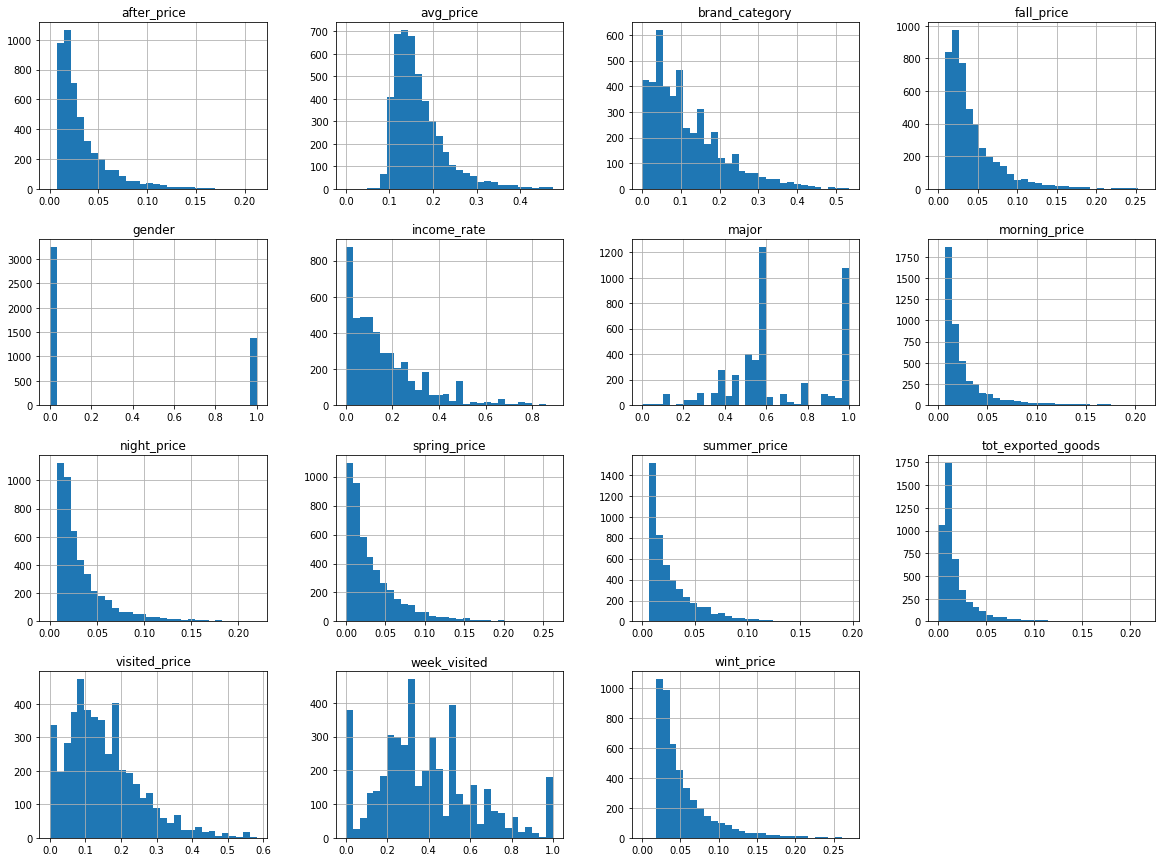

In [136]:
train_1.hist(bins=30, figsize=(20,15))

In [141]:
#Cross-Validation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#model = KNeighborsClassifier()
model = LogisticRegression()
#model = DecisionTreeClassifier()

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [170]:
scores = cross_val_score(model, dfX, dfy); scores

array([0.70182992, 0.70182992, 0.7007535 , 0.69396552, 0.70043103])

In [171]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))
# 분산이 작으면 Overfitting 이 적다

Mean: 0.700
Std: 0.003
Min: 0.694
Max: 0.702


In [181]:
#남녀 비율 조정
train_1['gender'].value_counts()

0.0    3257
1.0    1386
Name: gender, dtype: int64

In [146]:
from imblearn.combine import *
from imblearn.combine import SMOTETomek

In [173]:
scores = cross_val_score(model, dfX, dfy); scores

array([0.70182992, 0.70182992, 0.7007535 , 0.69396552, 0.70043103])

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [174]:
tree3 = DecisionTreeClassifier(max_depth=4, random_state=0)

tree3.fit(X_train, y_train)
y_pred3 = tree3.predict(X_test)

print(classification_report(y_test, y_pred3))
# (precision) 0 이라고 예측한 데이터의 71%만 실제로 0
# (precision) 1 이라고 예측한 데이터의 34%만 실제로 1
# (recall) 실제 0인 데이터중 98%가 0으로 판별됨 
# (recall) 실제 1인 데이타중 3%만 1로 판별됨
# recall 에서 0과 1의 판별결과가 현격한 차이가 남.

              precision    recall  f1-score   support

         0.0       0.72      0.98      0.83       840
         1.0       0.20      0.02      0.03       321

    accuracy                           0.71      1161
   macro avg       0.46      0.50      0.43      1161
weighted avg       0.58      0.71      0.61      1161



In [150]:
from imblearn.under_sampling import TomekLinks

In [175]:
XX, yy = TomekLinks().fit_sample(X_train, y_train)
tree0 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree0.fit(XX, yy)
y_pred0 = tree0.predict(X_test)

print(classification_report(y_test, y_pred0))
# Under-Sampling 기법은 precision/recall/f1-score 개선이 미미함

              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81       840
         1.0       0.38      0.16      0.22       321

    accuracy                           0.70      1161
   macro avg       0.56      0.53      0.52      1161
weighted avg       0.64      0.70      0.65      1161



In [152]:
from imblearn.combine import SMOTETomek

In [176]:
# Tomek links: a under-sampling class method
XX, yy = SMOTETomek(random_state=0).fit_sample(X_train, y_train)
tree0 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree0.fit(XX, yy)
y_pred0 = tree0.predict(X_test)

print(classification_report(y_test, y_pred0))

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       840
         1.0       0.34      0.38      0.36       321

    accuracy                           0.62      1161
   macro avg       0.54      0.55      0.54      1161
weighted avg       0.64      0.62      0.63      1161



In [177]:
XX, yy = SMOTETomek(random_state=0).fit_sample(X_train, y_train)

In [178]:
tree3 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree3.fit(XX, yy)
y_pred3 = tree3.predict(X_test)

print(classification_report(y_test, y_pred3))
# (precision) 0 이라고 예측한 데이터의 74%만 실제로 0
# (precision) 1 이라고 예측한 데이터의 33%만 실제로 1
# (recall) 실제 0인 데이터중 56%만 0으로 판별됨 
# (recall) 실제 1인 데이타중 52%만 1로 판별됨

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       840
         1.0       0.34      0.38      0.36       321

    accuracy                           0.62      1161
   macro avg       0.54      0.55      0.54      1161
weighted avg       0.64      0.62      0.63      1161



In [179]:
tree3.score(X_test,y_test)

0.6192937123169682

In [180]:
from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(X_train, y_train).score(X_test, y_test)

0.0    840
1.0    321
Name: gender, dtype: int64


0.7235142118863049

In [164]:
train_1

,gender,avg_price,brand_category,income_rate,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
0,0.0,0.118288,0.060150,0.267,1.000,1.000000,0.011672,0.009988,0.015525,0.022815,0.015213,0.008452,0.017459,0.041942,0.090909
1,0.0,0.112213,0.037594,0.111,0.375,0.458333,0.006601,0.014424,0.013169,0.011797,0.010484,0.008452,0.017459,0.032268,0.022727
2,0.0,0.230606,0.157895,0.056,0.375,0.625000,0.016517,0.069298,0.042237,0.081983,0.081793,0.008452,0.061526,0.145681,0.227273
3,0.0,0.143117,0.105263,0.393,0.286,1.000000,0.032698,0.009988,0.019533,0.062933,0.047305,0.008452,0.031474,0.048938,0.181818
4,0.0,0.250087,0.030075,0.000,1.000,0.916667,0.005204,0.009988,0.009950,0.047641,0.040429,0.008452,0.017459,0.023295,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0.144658,0.195489,0.108,0.436,0.583333,0.030851,0.031578,0.053044,0.130831,0.045306,0.077087,0.054697,0.131395,0.251818
4996,0.0,0.256159,0.067669,0.294,0.385,0.208333,0.037796,0.030664,0.044967,0.011797,0.049208,0.013763,0.046720,0.073489,0.056000
4997,1.0,0.231242,0.097744,0.405,0.190,1.000000,0.089636,0.105267,0.055334,0.011797,0.043064,0.068114,0.093306,0.066664,0.138545
4998,1.0,0.123299,0.067669,0.077,0.143,0.916667,0.006999,0.009988,0.017516,0.015876,0.008163,0.009912,0.029530,0.032497,0.155818


In [195]:
#또다른 모델링의 시도... 실패

from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
# create sample dataset
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
lle.fit(train_1)


LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
                       method='standard', modified_tol=1e-12, n_components=2,
                       n_jobs=None, n_neighbors=10, neighbors_algorithm='auto',
                       random_state=42, reg=0.001, tol=1e-06)

In [197]:
LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=2,
            n_jobs=1, n_neighbors=10, neighbors_algorithm='auto',
            random_state=42, reg=0.001, tol=1e-06)


LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
                       method='standard', modified_tol=1e-12, n_components=2,
                       n_jobs=1, n_neighbors=10, neighbors_algorithm='auto',
                       random_state=42, reg=0.001, tol=1e-06)

ValueError: 'c' argument has 1000 elements, which is not acceptable for use with 'x' with size 4643, 'y' with size 4643.

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47484 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54204 missing from current

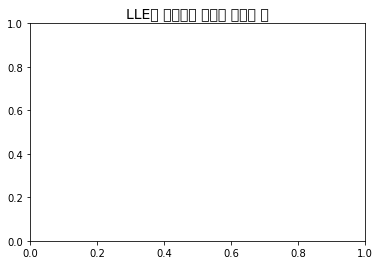

In [200]:
train_1_reduced = lle.transform(train_1)

plt.title("LLE를 사용하여 펼쳐진 스위스 롤", fontsize=14)
plt.scatter(train_1_reduced[:, 0], train_1_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()



In [201]:
from sklearn.manifold import MDS, Isomap, TSNE

In [203]:
# MDS
mds = MDS(n_components=2, random_state=42)
train_1_reduced_mds = mds.fit_transform(train_1)

# Isomap
isomap = Isomap(n_components=2)
train_1_reduced_isomap = isomap.fit_transform(train_1)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
train_1_reduced_tsne = tsne.fit_transform(X)

In [ ]:
titles = ["MDS", "Isomap", "t-SNE"]
plt.figure(figsize=(11,4))
for subplot, title, train_1_reduced in zip((131, 132, 133), titles,
                                     (train_1_reduced_mds, train_1_reduced_isomap, train_1_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(train_1_reduced[:, 0], train_1_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
plt.show()
